# **Assignment 4:**
# Data Analytics

This notebook explore the "titanic" dataset built into Seaborn.

First, we start with the importation of the required packages and libraries that we are going to need later.

In [2]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Then, we proceed to read the titanic dataset from Seaborn library:

In [3]:
titanic = sns.load_dataset("titanic")
display(titanic.head())
display(titanic.tail())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


And finally we can start exploring the data:

### <u> Missing Data Exploration </u>

**a) Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn.**

We can use the pandas method *isnull()* to see if any variable has missing values:

In [4]:
titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

We can see that the variables *age*, *embarked*, *deck*, and *embark_town* have some missing values.

To determine how much missing data there is for each variable, we can use again the *isnull()* method:

In [5]:
missing_values = titanic.isnull().sum().reset_index()
missing_values.columns = ["Variable","Count"]
missing_values

,Variable,Count
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


Alternatively, we can use the *info()* method to check basic information from the data categories. *info()* shows us a summary of the number of entries, if there are non-null values, and the data types present in the dataset.

In [6]:
# Check basic info from data categories
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


There are 15 columns and a total of 891 global entries in the dataset, but *age* has just 714 non-null entries (177 missing), *embarked* has 889 (2 missing), *deck* has 203 (688 missing), and *embarked_town* 889 (2 missing). 

Now, we can plot how much missing data there is for each variable using seaborn:

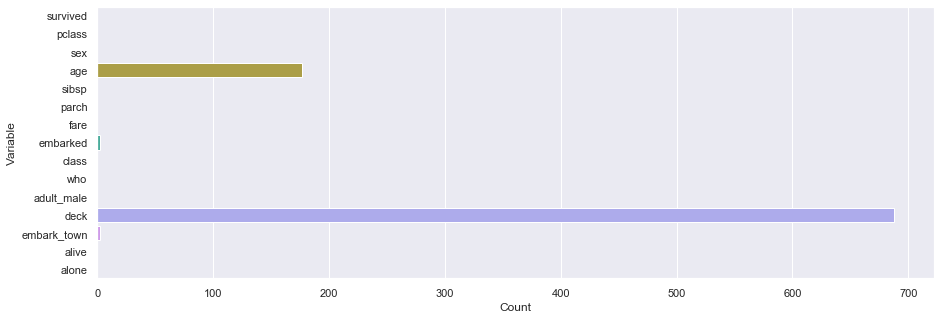

In [7]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot()
sns.barplot(y="Variable",x="Count",data=missing_values, ax=ax);

**b) Determine how much missing data there is for each passenger.**

We should start analyzing how many categories of passengers there are:

In [8]:
print(titanic['who'].unique())
#passengers_counts=titanic['who'].value_counts()
#display(passengers_counts)

['man' 'woman' 'child']


There are 3 different categories of passengers: man, woman, and child.

Now, we can determine how much missing data there is for each passenger category and plot it using  vertical plot.

,passenger,count
0,man,562
1,woman,237
2,child,70


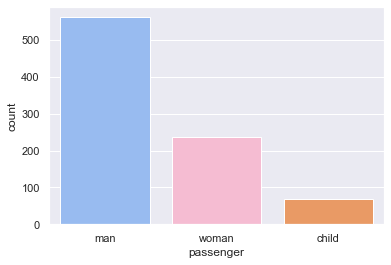

In [9]:
missing_values_man = titanic[titanic['who']=='man'].isnull().sum().sum()
missing_values_woman = titanic[titanic['who']=='woman'].isnull().sum().sum()
missing_values_child = titanic[titanic['who']=='child'].isnull().sum().sum()
missing_values_passenger = pd.DataFrame({'passenger':['man', 'woman', 'child'], 'count':[missing_values_man, missing_values_woman, missing_values_child]})
display(missing_values_passenger)

colors = ["carolina blue", "powder pink", "pastel orange"]

fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(y="count",x="passenger",data=missing_values_passenger, palette=sns.xkcd_palette(colors), ax=ax);

**c) Put both axes on the same figure.**

We can put both axes on the same figure using the add_subplot() function of the matplotlib library.

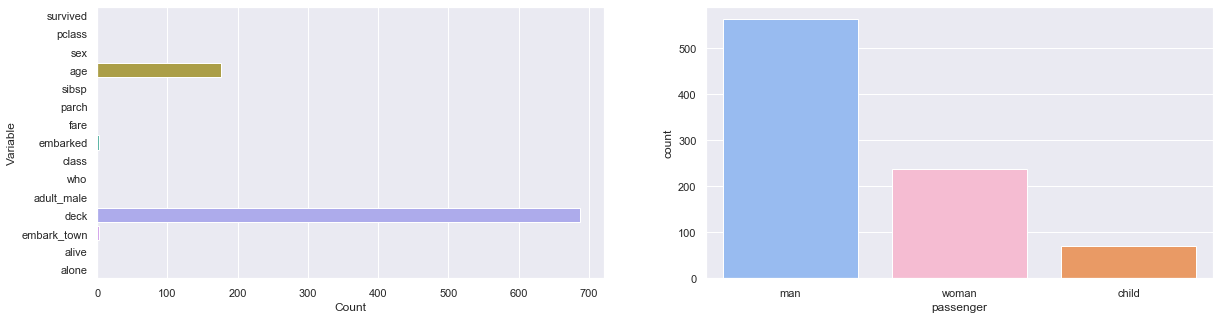

In [10]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
sns.barplot(y="Variable",x="Count",data=missing_values, ax=axes[0])
sns.barplot(y="count",x="passenger",data=missing_values_passenger, palette=sns.xkcd_palette(colors), ax=axes[1])

### <u> Survival Exploration </u>

**a) Create a pairplot for all numerical variables in the dataset (dropna for age), colored by survival.**

First, we can select the subset of the dataframe including numerical values by using the *select_dtypes()* function.

In [11]:
titanic_numerical = titanic.select_dtypes(include='number')
titanic_numerical

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [12]:
titanic_numerical.isnull().any()

survived    False
pclass      False
age          True
sibsp       False
parch       False
fare        False
dtype: bool

The only variable with null values is *age*. We can drop all the rows with null values for age using *dropna()* function:

In [13]:
titanic_numerical_noNan = titanic_numerical.dropna(subset=['age'])
titanic_numerical_noNan

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
889,1,1,26.0,0,0,30.0000


And then, plot the variables by pairs using *pairplot()*:

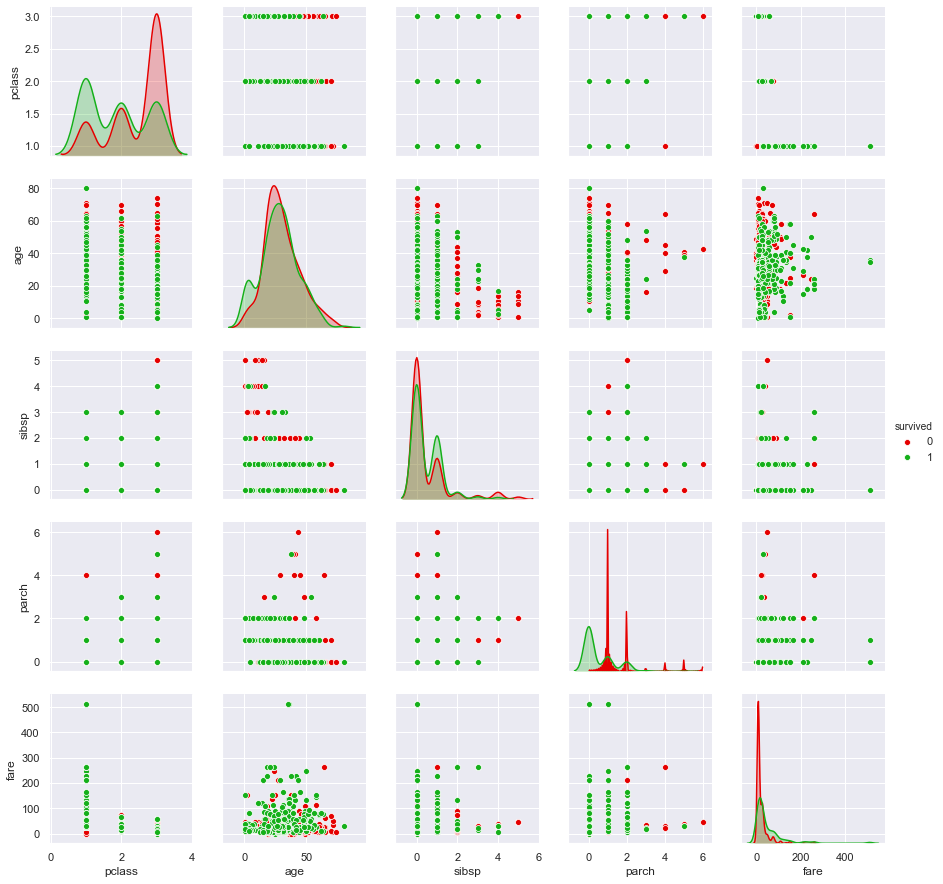

In [14]:
colors = ["red", "green"]
g = sns.pairplot(titanic_numerical_noNan, vars = ['pclass', 'age', 'sibsp', 'parch', 'fare'], hue='survived', palette=sns.xkcd_palette(colors));

Alternatively, we can drop the entire *age* column, and pairplot the rest of variables:

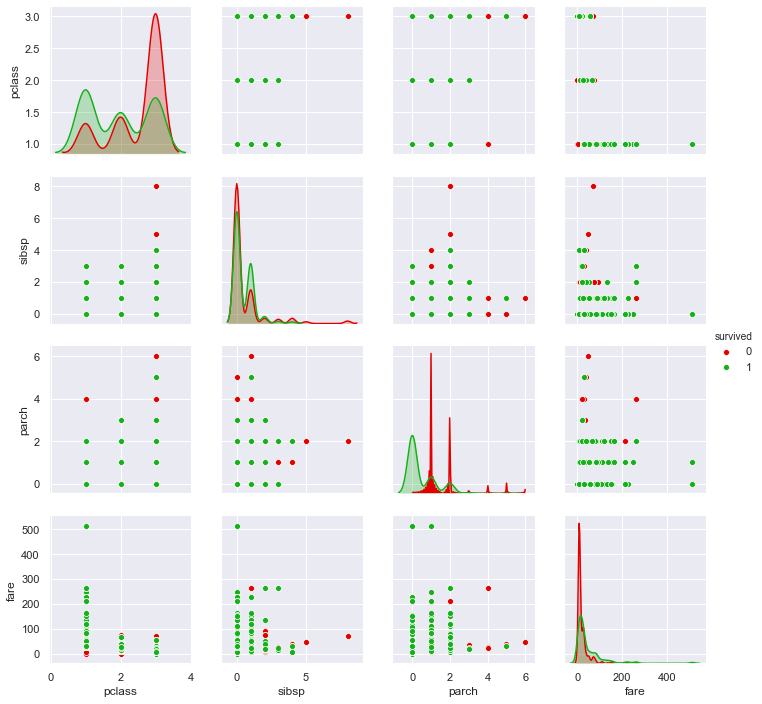

In [15]:
titanic_numerical_noAge = titanic_numerical.dropna(axis='columns')
#titanic_numerical_noage

colors = ["red", "green"]
sns.pairplot(titanic_numerical_noAge, vars = ['pclass', 'sibsp', 'parch', 'fare'], hue='survived', palette=sns.xkcd_palette(colors));

**b) Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult older adult**

First, we can analyze the variable age using the function *describe()* to see the range of ages

In [16]:
titanic['age'].describe()
#titanic_noNanAge

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

The minimum age in the dataset is 0.42 years old, and the maximum age is 80 years old. We can establish the range of ages for the different categories as follows:
* child: 0 to 12
* younger adult: 12 to 35
* adult: 35 to 60
* older adult: 60 to 80

In [17]:
#display(survivors)
age_categories = ["child", "younger adult", "adult", "older adult"]
age_ranges = [0, 12, 35, 60, 80]

#titanic_noNanAge = titanic_noNanAge.copy()
titanic['age_range'] = pd.cut(titanic['age'], age_ranges, labels=age_categories)
#titanic

Now, we clean the rows with missing data in the age column:

In [18]:
titanic_noNanAge = titanic.dropna(subset=['age'])
#titanic_noNanAge

And then we can plot the distribution of passengers by age group:

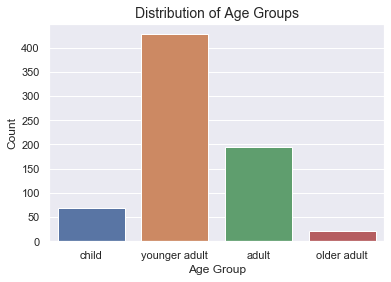

In [19]:
sns.barplot(x=age_categories, y=titanic_noNanAge.groupby(['age_range']).size(), data=titanic_noNanAge)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group');

Additionally, we can split the dataset according to the survival data:

In [20]:
survivors = titanic_noNanAge[titanic_noNanAge['survived']==1]
#display(survivors.head())
non_survivors = titanic_noNanAge[titanic_noNanAge['survived']==0]
#display(non_survivors.head())

And then, we can plot the survival information by age group in a stacked barplot:

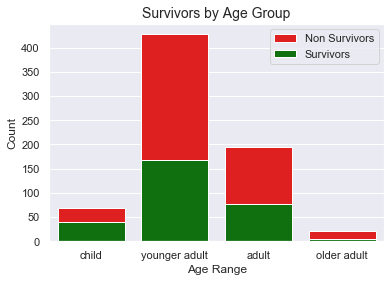

In [21]:
# grouping survivors and non_survivors by age range
survivors_ageRange = survivors.groupby(['age_range']).size().values
non_survivors_ageRange = non_survivors.groupby(['age_range']).size().values
totals = survivors_ageRange + non_survivors_ageRange

fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(x=age_categories, y=totals, data=titanic_noNanAge, ax=ax, color='red', label="Non Survivors")
sns.barplot(x=age_categories, y=survivors_ageRange, data=titanic_noNanAge, ax=ax, color='green', label="Survivors")

ax.set_ylabel("Count")
ax.set_xlabel("Age Range")
ax.set_title("Survivors by Age Group",fontsize=14);
ax.legend()

**c.1) Survival probability by passenger class and passenger gender, to evaluate how the passenger class impacted on the survival rate**

Using the seaborn function *factorplot()*, we can plot the *pclass* variable versus the *survived* variable and analyze the survival probability by passenger class.

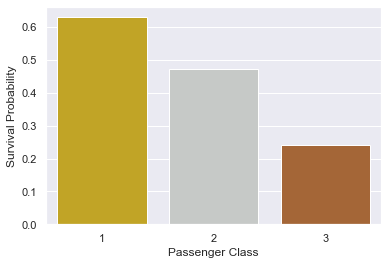

In [22]:
colors = ["gold", "silver", "copper"]

# survival rate by passenger class
sns.barplot(x='pclass', y='survived', palette=sns.xkcd_palette(colors), data=titanic, ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability');

Moreover, if we color the plot by passenger gender, we can easily see how the survival rate is distributed in each class by gender.

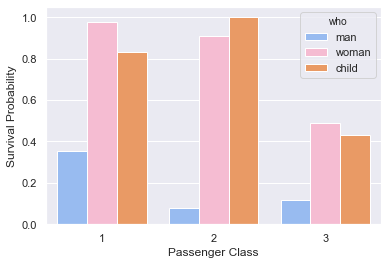

In [23]:
colors = ["carolina blue", "powder pink", "pastel orange"]

# survival rate of gender by passenger class
sns.barplot(x='pclass', y='survived', hue='who', palette=sns.xkcd_palette(colors), data=titanic, ci=None)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Probability');

**c.2) Survival rate by sex, to evaluate the impact of gender on the survival rate**

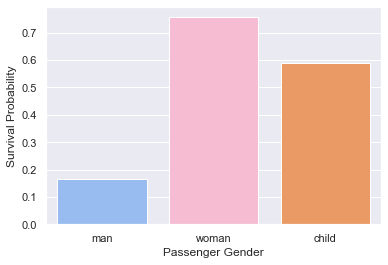

In [24]:
colors = ["carolina blue", "powder pink", "pastel orange"]

# survival rate of passenger gender (who)
sns.barplot(x='who', y='survived', palette=sns.xkcd_palette(colors), data=titanic, ci=None)
plt.xlabel('Passenger Gender')
plt.ylabel('Survival Probability');

Additionally, we can add more information to this plot by coloring for example by embarked town, or if the passenger traveled alone or not:

[Text(0, 0.5, 'Survival Probability'), Text(0.5, 0, 'Gender')]

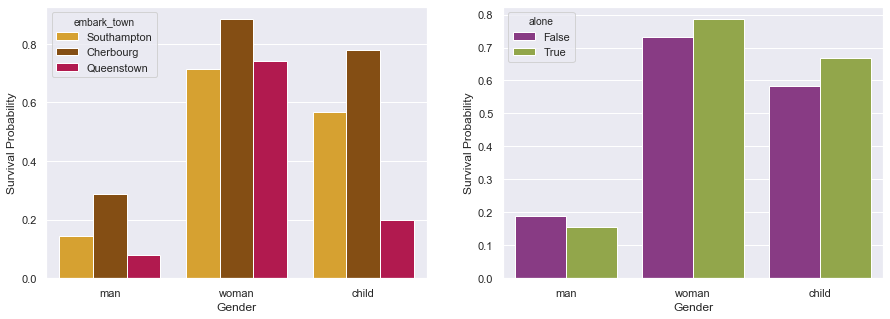

In [26]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

# survival rate of passenger gender by embarked port
colors1 = ["squash", "warm brown", "ruby"]
sns.barplot(x='who', y='survived', palette=sns.xkcd_palette(colors1), hue='embark_town', data=titanic, ci=None, ax=axes[0])
axes[0].set(xlabel='Gender', ylabel='Survival Probability')

# survival rate of passenger gender by embarked port
colors2 = ["warm purple", "booger"]
sns.barplot(x='who', y='survived', palette=sns.xkcd_palette(colors2), hue='alone', data=titanic, ci=None, ax=axes[1])
axes[1].set(xlabel='Gender', ylabel='Survival Probability')